In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-4,4,500)       
y = x + np.random.standard_normal(500)+2.5

In [59]:
x_orig = np.array([61789, 22899, 68500, 54000, 65674, 60949, 93000, 48235, 76025, 67000, 97500, 74000, 63060, 82029, 84000, 144500, 89000, 166800, 114800, 176000, 185530, 150500, 139800, 240000])
y_orig = np.array([8290, 7990, 7990, 7990, 7555, 7490, 6990, 6900, 6900, 6800, 6800, 6600, 6390, 6390, 6200, 5999, 5990, 5800, 5350, 5250, 4450, 4400, 3800, 3650])



In [4]:
x = np.array([1.00, 0.54, 0.59, 0.75, 0.71, 0.42, 0.66, 0.30, 0.56, 0.28, 0.27, 0.18, 0.24, 0.34, 0.20, 0.24, 0.12, 0.32, 0.18, 0.20, 0.14, 0.21, 0.00, 0.18])
y = np.array([0.00, 0.03, 0.16, 0.17, 0.34, 0.37, 0.46, 0.50, 0.51, 0.55, 0.59, 0.59, 0.64, 0.68, 0.68, 0.70, 0.70, 0.72, 0.83, 0.84, 0.94, 0.94, 0.94, 1.00])


In [5]:
y

array([0.  , 0.03, 0.16, 0.17, 0.34, 0.37, 0.46, 0.5 , 0.51, 0.55, 0.59,
       0.59, 0.64, 0.68, 0.68, 0.7 , 0.7 , 0.72, 0.83, 0.84, 0.94, 0.94,
       0.94, 1.  ])

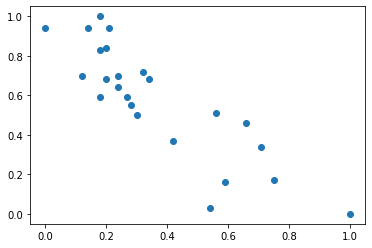

In [6]:
plt.plot(x, y, 'o')
plt.show()

In [51]:
def cost(X, Y, theta):
    J=np.dot((np.dot(X,theta) - Y).T,(np.dot(X,theta) - Y))/(2*len(Y))
    return J

def cost_2(Y, error):
    J = (error.T).dot(error)/(2*len(Y))
#     print(J)
    return J


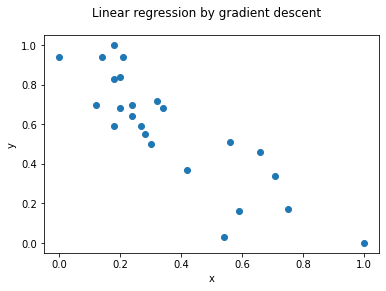

[[ 0.66662957]
 [-0.28349153]]


In [52]:
# In this solution calculation of a variable (b) fails.
# the value is extremely high and that leads wrong result.


plt.plot(x, y, 'o')

alpha = 0.1 # Specify the learning rate
theta =  np.array([[0,0]]).T # Initial values of theta

X = np.c_[np.ones(len(x)),x]
Y = np.c_[y]
X_1=np.c_[x].T
num_iters = 100
cost_history=[]
theta_history=[]
for i in range(num_iters):
    a=np.sum(theta[0] - alpha * (1/len(Y)) * np.sum((np.dot(X,theta)- Y)))
    b=np.sum(theta[1] - alpha * (1/len(Y)) * np.sum(np.dot(X_1,(np.dot(X,theta)-Y))))
    theta= np.array([[a],[b]])
    cost_history.append(cost(X,Y,theta))
    theta_history.append(theta)
    if i in (1,3,7,10,14,num_iters):
#         plt.plot(x, a+x*b)
        plt.suptitle('Linear regression by gradient descent')
        plt.xlabel('x')
        plt.ylabel('y')
plt.show()
print(theta)

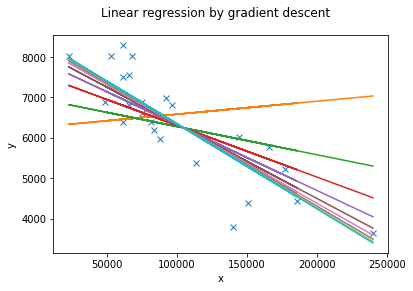

[[ 7.97829567e+03]
 [-9.86880424e-01]]


In [80]:
plt.plot(min_x + x * value_range_x, min_y + y * value_range_y, 'x')

alpha = 1 # Specify the learning rate
theta =  np.array([[0,0]]).T # Initial values of theta

min_x = np.min(x_orig)
max_x = np.max(x_orig)
min_y = np.min(y_orig)
max_y = np.max(y_orig)
value_range_x = max_x - min_x
value_range_y = max_y - min_y
X = np.c_[np.ones(len(x)),x]
Y = np.c_[y]
X_1=np.c_[x].T
num_iters = 80
cost_history=[]
theta_history=[]
for i in range(num_iters):
    error = X.dot(theta) - Y
#     print(error)
    a = np.sum(theta[0] - alpha * (1/len(Y)) * np.sum(error))
    b = np.sum(theta[1] - alpha * (1/len(Y)) * np.sum(X_1.dot(error)))
    cost_history.append(cost_2(Y, error))
    theta_history.append(theta)
    theta = np.array([[a],[b]])
    if i in (0, num_iters - 1):
        plt.plot(min_x + x * value_range_x, min_y + (a+x*b) * value_range_y)
    elif i in range(0, num_iters, 10):
        plt.plot(min_x + x * value_range_x, min_y + (a+x*b) * value_range_y)
plt.suptitle('Linear regression by gradient descent')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
theta[0] = min_y + theta[0].dot(value_range_y)
print(theta)

In [20]:
print(Y)
print(y)
print(Y.T)
print(theta)


[[0.  ]
 [0.03]
 [0.16]
 [0.17]
 [0.34]
 [0.37]
 [0.46]
 [0.5 ]
 [0.51]
 [0.55]
 [0.59]
 [0.59]
 [0.64]
 [0.68]
 [0.68]
 [0.7 ]
 [0.7 ]
 [0.72]
 [0.83]
 [0.84]
 [0.94]
 [0.94]
 [0.94]
 [1.  ]]
[0.   0.03 0.16 0.17 0.34 0.37 0.46 0.5  0.51 0.55 0.59 0.59 0.64 0.68
 0.68 0.7  0.7  0.72 0.83 0.84 0.94 0.94 0.94 1.  ]
[[0.   0.03 0.16 0.17 0.34 0.37 0.46 0.5  0.51 0.55 0.59 0.59 0.64 0.68
  0.68 0.7  0.7  0.72 0.83 0.84 0.94 0.94 0.94 1.  ]]
[[ 0.94038118]
 [-1.00685416]]


In [21]:
len(Y)

24